<a href="https://colab.research.google.com/github/4REHMA70/titanic_dataset/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #74A82D; color: white; padding: 15px; border-radius: 5px; margin: 10px 0;">
    <h1 style="margin: 0;">🚀 Titanic Survival Prediction Challenge - A Machine Learning Tutorial</h1>
</div>

![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/Presentation1.png?raw=true)

<div style="background-color: #FF5722; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h1 style="margin: 0;">⚙️ Environment Setup Guide</h1>
</div>

<div style="background-color: #009688; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">Prerequisites:</h2>
</div>

1. Python Installation (3.8+ recommended)
2. VSCode
3. Required Extensions and Packages

<div style="background-color: #009688; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">Step-by-Step Setup:</h2>
</div>

<div style="background-color: #00BCD4; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3 style="margin: 0;">1. Python Installation</h3>
</div>

- Download Python from python.org or Software Center
- Check "Add Python to PATH" during installation
- Open file
- Select python environment in jupyter notebook
- Verify installation with the code below:


In [ ]:
# Run this cell to verify Python installation
import sys
print(f"Python version: {sys.version}")

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


<div style="background-color: #00BCD4; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3 style="margin: 0;">2. Required VSCode Extensions</h3>
</div>

- Python (Microsoft)
- Jupyter
- Pylance

<div style="background-color: #00BCD4; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3 style="margin: 0;">3. Required Packages</h3>
</div>

**Learning sources:** Kaggle, Library documentation (scikit-learn, seaborn, matplotlib, imblearn)

Run the following cell to install necessary packages:


In [ ]:
# Run this cell to install required packages
!pip install pandas numpy scikit-learn matplotlib seaborn ipykernel plotly dtreeviz scipy
# Important: Dtreeviz requires admin access

In [ ]:
# Verify installations
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

print("All required packages installed successfully!")

All required packages installed successfully!


<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h1 style="margin: 0;">Data Loading and Exploratory Data Analysis (EDA)</h1>
</div>

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">1. Loading the Dataset</h2>
</div>


In [ ]:
# Load the training dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/4REHMA70/titanic_dataset/refs/heads/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/4REHMA70/titanic_dataset/refs/heads/main/test.csv')

# Display first few rows and basic information
print("\n📊 5 rows of our dataset:")
train_data.tail(5) # Additional examples: .sample(), .tail()


📊 5 rows of our dataset:


PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
print("\n📋 Dataset Information:")
train_data.info()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***The test set does not provide passengers survival status***. Instead, we are going to use our model to predict survival status.


***
**Categorical:**
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown)
            S(Southampton)
        
- **Dichotomous** (Nominal variable with only two categories)
   > - **Sex**
            Female
            Male
- **Ordinal** (variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Pclass** (A proxy for socio-economic status (SES))
            1(Upper)
            2(Middle)
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp** (Number of Siblings/Spouses)
  >  - **Parch** (Number of Parents/Children)
  >  - **Survived** (Our outcome or dependent variable)
            0
            1
- **Continous**
>  - **Age**
>  - **Fare**
***
**Text Variable**
> - **Ticket** (Ticket number for passenger.)
> - **Name** (Name of the passenger.)


In [ ]:
train_data[['Name','Ticket']]

Name            Ticket
0                              Braund, Mr. Owen Harris         A/5 21171
1    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599
2                               Heikkinen, Miss. Laina  STON/O2. 3101282
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)            113803
4                             Allen, Mr. William Henry            373450
..                                                 ...               ...
886                              Montvila, Rev. Juozas            211536
887                       Graham, Miss. Margaret Edith            112053
888           Johnston, Miss. Catherine Helen "Carrie"        W./C. 6607
889                              Behr, Mr. Karl Howell            111369
890                                Dooley, Mr. Patrick            370376

[891 rows x 2 columns]

In [ ]:
# Additional filters
train_data[train_data['Survived']==0]

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch           Ticket     Fare Cabin Embarked  
0      male  22.0      1      0        A/5 21171   7.2500   NaN        S  
4      male  35.0      0      0           373450   8.0500   NaN        S  
5      male   NaN      0      0           330877   8.4583   NaN        Q  
6      male  54.0      0      0            17463  51.8625   E46        S  
7      male   2.0      3      1           349909  21.0750   NaN        S  
..      ...   ...    ...    ...              ...      ...   ...      ...  
884    male  25.0      0      0  SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5           382652  29.1250   NaN        Q  
886    male  27.0      0      0           211536  13.0000   NaN        S  
888  female   NaN      1      2       W./C. 6607  23.4500   NaN        S  
890    male  32.0      0      0           370376   7.7500   NaN        Q  

[549 rows x 12 columns]

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">2. Initial Data Exploration</h2>
</div>

Let's understand our data better by checking:
- Basic statistics
- Missing values
- Distribution of key features


In [ ]:
# TITANIC SURVIVAL PREDICTION - Comprehensive Tutorial
# =================================================

# 1. Import Libraries
# -----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis

# Settings for plots
sns.set_palette("rocket")
sns.set_style('whitegrid')

In [ ]:
# 2. Load and Initial Exploration
# ----------------------------
# Basic statistics
train_data.describe() # or print(train_data.describe)

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
# Basic information about our dataset
print("Dataset Shape:", train_data.shape)
print("\nColumn Information:")
print(train_data.info())

# Check missing values
missing_values = train_data.isnull().sum()
print('_'*50)
print("\nMissing Values:")
print(missing_values[missing_values > 0])

Dataset Shape: (891, 12)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
__________________________________________________

Missing Values:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
feature = 'Sex'  # Embarked, Sex, Fare, etc
print("Value Counts:")
print(train_data[feature].value_counts(dropna=False))
stats = train_data[feature].value_counts(dropna=False).to_frame('Total')
stats['Percent'] = stats['Total'] * 100 / len(train_data)
stats

Value Counts:
Sex
male      577
female    314
Name: count, dtype: int64


Total    Percent
Sex                     
male      577  64.758698
female    314  35.241302

In [ ]:
print('Kurtosis: ',kurtosis(train_data['Fare'].dropna())) # Displaying peakedness of distribution
print('Skewness: ',skew(train_data['Fare'].dropna())) # Displaying skewness

Kurtosis:  33.20428925264474
Skewness:  4.7792532923723545


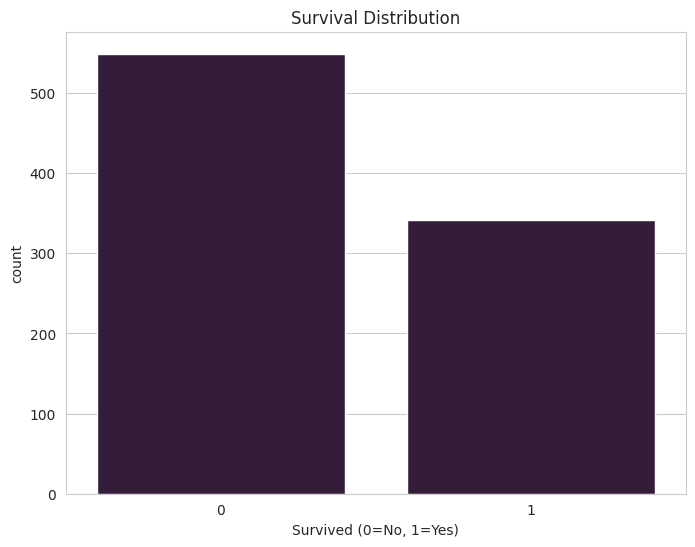

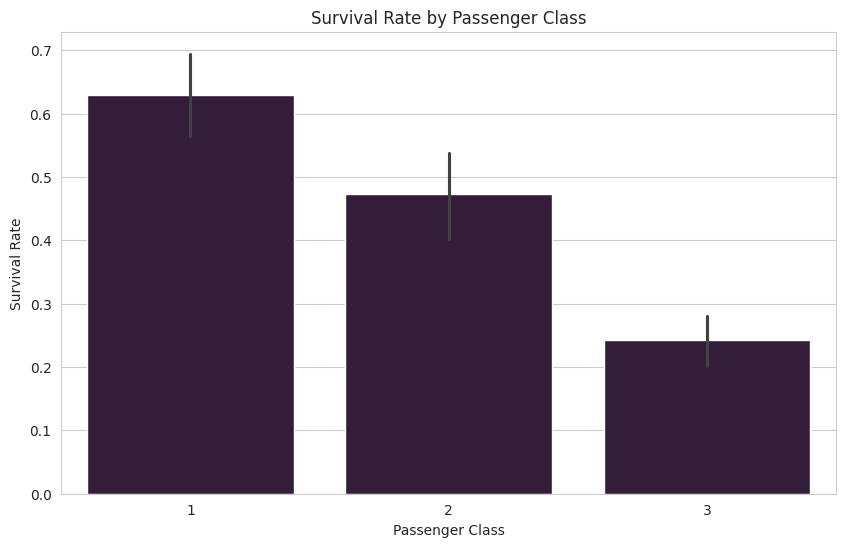

In [ ]:
# 3. Exploratory Data Analysis (EDA)
# -------------------------------

# 3.1 Survival Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

# 3.2 Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


- Classification Problem (as opposed to regression)
- Determines type of preprocessing, modelling, and evaluation used later on

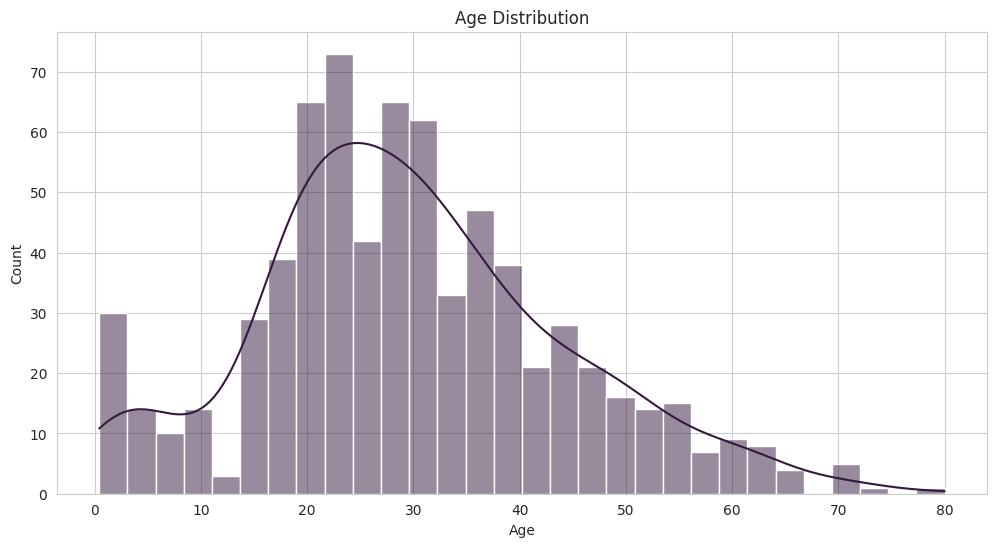

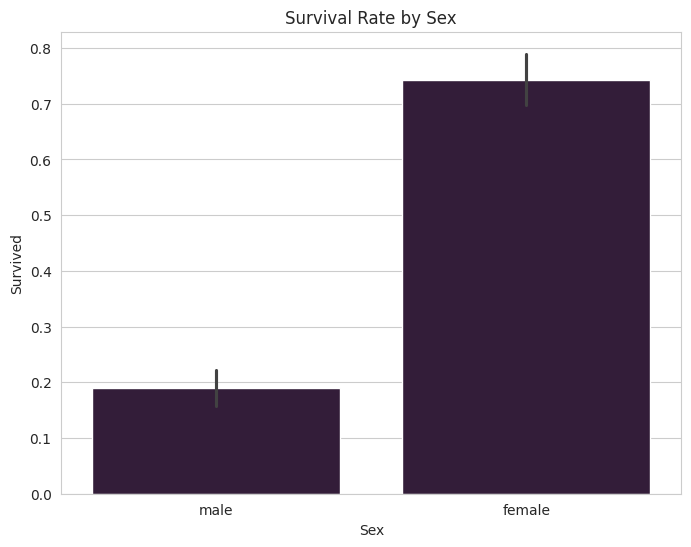

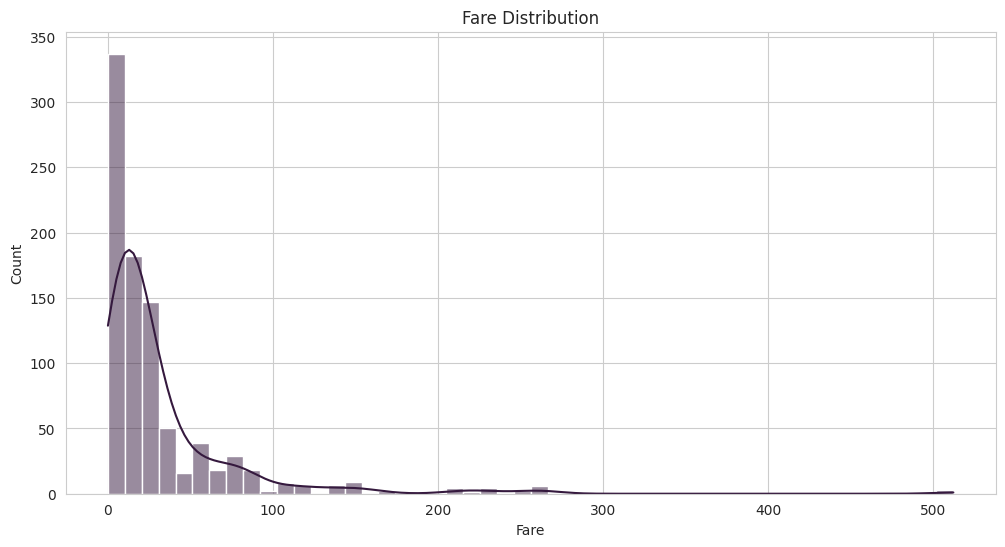

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3.3 Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 3.4 Survival by Sex
plt.figure(figsize=(8, 6))
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

# 3.5 Fare Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Fare', bins=50, kde=True)
plt.title('Fare Distribution')
plt.show()


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

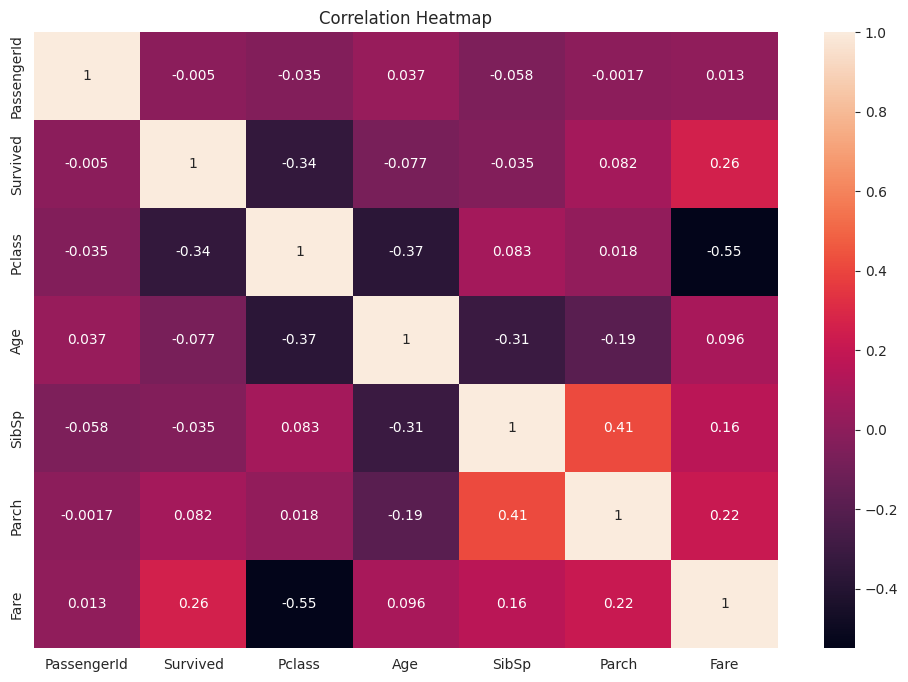

In [ ]:
# 3.6 Correlation Heatmap
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
display(train_data[numeric_cols].corr())
plt.figure(figsize=(12, 8))
sns.heatmap(train_data[numeric_cols].corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

Many more examples:

https://seaborn.pydata.org/examples/index.html

https://matplotlib.org/stable/gallery/index.html

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">3. Feature Engineering</h2>
</div>

In [ ]:
train_data[['Name']]

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
..                                                 ...
886                              Montvila, Rev. Juozas
887                       Graham, Miss. Margaret Edith
888           Johnston, Miss. Catherine Helen "Carrie"
889                              Behr, Mr. Karl Howell
890                                Dooley, Mr. Patrick

[891 rows x 1 columns]

In [ ]:
# 4. Feature Engineering
# -------------------

# 4.1 Create Title feature from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [ ]:
# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

# 4.2 Create Family Size feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# 4.3 Create Age Bands
train_data['AgeBand'] = pd.qcut(train_data['Age'].fillna(train_data['Age'].mean()), 5)

# Create age_class interaction
train_data['Age*Class'] = train_data['Age'] * train_data['Pclass']

# Fare per person
train_data['Fare_Per_Person'] = train_data['Fare']/(train_data['FamilySize'])

# Family size categories
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1


In [ ]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Title  FamilySize  \
0        0         A/5 21171   7.2500   NaN        S    Mr           2   
1        0          PC 17599  71.2833   C85        C   Mrs           2   
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss           1   
3        0            113803  53.1000  C123        S   Mrs           2   
4        0            373450   8.0500   NaN        S    Mr           1   
..     ...               ...      ...   ...      ...   ...         ...   
886      0            211536  13.0000   NaN        S  Rare           1   
887      0            112053  30.0000   B42        S  Miss           1   
888      2        W./C. 6607  23.4500   NaN        S  Miss           4   
889      0            111369  30.0000  C148        C    Mr           1   
890      0            370376   7.7500   NaN        Q    Mr           1   

            AgeBand  Age*Class  Fare_Per_Person  IsAlone  
0      (20.0, 28.0]       66.0          3.62500        0  
1    (29.699, 38.0]       38.0         35.64165        0  
2      (20.0, 28.0]       78.0          7.92500        1  
3    (29.699, 38.0]       35.0         26.55000        0  
4    (29.699, 38.0]      105.0          8.05000        1  
..              ...        ...              ...      ...  
886    (20.0, 28.0]       54.0         13.00000        1  
887   (0.419, 20.0]       19.0         30.00000        1  
888  (28.0, 29.699]        NaN          5.86250        0  
889    (20.0, 28.0]       26.0         30.00000        1  
890  (29.699, 38.0]       96.0          7.75000        1  

[891 rows x 18 columns]

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">4. Data Preprocessing: Splitting  || Outlier Removal || Imputing || Scaling</h2>
</div>

In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'AgeBand', 'Age*Class', 'Fare_Per_Person', 'IsAlone'],
      dtype='object')

![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/train_test_split-procedure.jpg?raw=true)

In [ ]:
# 5. Data Preprocessing
# ------------------

# 5.0 Outlier Detection and Removal
def remove_outliers(df, column, n_std):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[abs(df[column] - mean) > n_std * std].index
    print(f"Dropping {len(outliers)} outliers from column: {column}")
    return df.drop(outliers)

# Remove extreme outliers from Fare and Age
train_data = remove_outliers(train_data, 'Fare', 3) # 3 standard deviations
train_data = remove_outliers(train_data, 'Age', 3)
train_data = remove_outliers(train_data, 'Fare_Per_Person', 3)

# 5.1 Feature Selection and Preprocessing
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Age*Class', 'Fare_Per_Person', 'IsAlone', 'Title']
X = train_data[features].copy()
y = train_data['Survived']

# 5.2 Handle Missing Values
# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Handle numerical missing values
num_imputer = SimpleImputer(strategy='median')
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])

# Handle categorical missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

# 5.3 Categorical Encoding: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X

Dropping 20 outliers from column: Fare
Dropping 2 outliers from column: Age
Dropping 25 outliers from column: Fare_Per_Person


Pclass   Age  SibSp  Parch     Fare  FamilySize  Age*Class  \
0       3.0  22.0    1.0    0.0   7.2500         2.0       66.0   
1       1.0  38.0    1.0    0.0  71.2833         2.0       38.0   
2       3.0  26.0    0.0    0.0   7.9250         1.0       78.0   
3       1.0  35.0    1.0    0.0  53.1000         2.0       35.0   
4       3.0  35.0    0.0    0.0   8.0500         1.0      105.0   
..      ...   ...    ...    ...      ...         ...        ...   
886     2.0  27.0    0.0    0.0  13.0000         1.0       54.0   
887     1.0  19.0    0.0    0.0  30.0000         1.0       19.0   
888     3.0  28.0    1.0    2.0  23.4500         4.0       60.0   
889     1.0  26.0    0.0    0.0  30.0000         1.0       26.0   
890     3.0  32.0    0.0    0.0   7.7500         1.0       96.0   

     Fare_Per_Person  IsAlone  Sex_male  Embarked_Q  Embarked_S  Title_Miss  \
0            3.62500      0.0      True       False        True       False   
1           35.64165      0.0     False       False       False       False   
2            7.92500      1.0     False       False        True        True   
3           26.55000      0.0     False       False        True       False   
4            8.05000      1.0      True       False        True       False   
..               ...      ...       ...         ...         ...         ...   
886         13.00000      1.0      True       False        True       False   
887         30.00000      1.0     False       False        True        True   
888          5.86250      0.0     False       False        True        True   
889         30.00000      1.0      True       False       False       False   
890          7.75000      1.0      True        True       False       False   

     Title_Mr  Title_Mrs  Title_Rare  
0        True      False       False  
1       False       True       False  
2       False      False       False  
3       False       True       False  
4        True      False       False  
..        ...        ...         ...  
886     False      False        True  
887     False      False       False  
888     False      False       False  
889      True      False       False  
890      True      False       False  

[844 rows x 16 columns]

In [ ]:
# 5.4 Feature Scaling
# Log transform for skewed numerical features
skewed_features = ['Fare', 'Fare_Per_Person']
for feature in skewed_features:
    if feature in X.columns:
        X[feature] = np.log1p(X[feature])

![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/PZgJ2.png?raw=true)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Final Dataset Check
print("\nFinal dataset shape:", X.shape)
print("\nFeatures used:", list(X.columns))
print("\nClass distribution:\n", y.value_counts(normalize=True))


Final dataset shape: (844, 16)

Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Age*Class', 'Fare_Per_Person', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Class distribution:
 Survived
0    0.637441
1    0.362559
Name: proportion, dtype: float64


<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">5. Feature Selection and Synthetic Minority Oversampling Technique (SMOTE)
</h2>
</div>

In [ ]:
!pip install imblearn

In [ ]:
# 5.5 Remove Highly Correlated Features
def remove_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs() # Getting absolute correlation and filtering upper outliers exceeding the 0.8 threshold
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

X = remove_correlated_features(X)

# 5.6 Check for Class Imbalance
class_counts = y.value_counts()
print("Class Counts:\n",class_counts)
if class_counts[0]/len(y) > 0.6 or class_counts[1]/len(y) > 0.6:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X, y = smote.fit_resample(X, y)

print("\nFinal dataset shape:", X.shape)
print("\nFeatures used:", list(X.columns))
print("\nClass distribution:\n", y.value_counts(normalize=True))

Class Counts:
 Survived
0    538
1    306
Name: count, dtype: int64

Final dataset shape: (1076, 14)

Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age*Class', 'Fare_Per_Person', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mrs', 'Title_Rare']

Class distribution:
 Survived
0    0.5
1    0.5
Name: proportion, dtype: float64


![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/1_QaNfJwU6P-VnG1zp3U4cVg.png?raw=true)

https://www.kaggle.com/code/tanmay111999/stroke-prediction-effect-of-data-leakage-smote

<div style="background-color: purple; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h1 style="margin: 0;">Prediction Results</h1>
</div>

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">6. Model Building, Tuning and Evaluation</h2>
</div>

![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/1718274808780.jpg?raw=true)

![alt text](https://github.com/4REHMA70/titanic_dataset/blob/main/1_hmtbIgxoflflJqMJ_UHwXw.jpg?raw=true)

Random Forest is an ensemble (collection) of Decision Trees, where each Tree splits randomly sampled data based on purity and then votes on its instance type (survived vs not-survived)


Cross-validation scores: [0.74074074 0.79534884 0.73953488 0.78139535 0.77674419]
Average CV score: 0.7667527993109389

Model Accuracy: 0.8287037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.86      0.81      0.83       113

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216



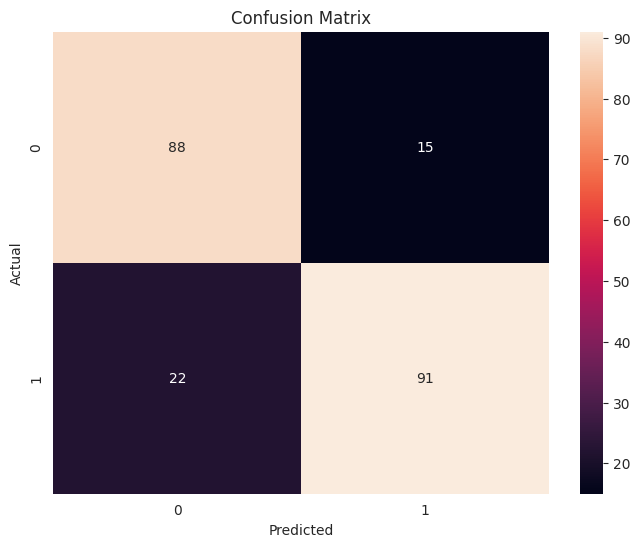

In [ ]:
# 6. Model Building and Evaluation
# -----------------------------

# 6.1 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 6.2 Train model
model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)

# 6.3 Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

# 6.4 Make predictions
predictions = model.predict(X_test)

# 6.5 Evaluate model
print("\nModel Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# 6.6 Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='rocket')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

![alt text](https://raw.githubusercontent.com/4REHMA70/titanic_dataset/refs/heads/main/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.avif)

For more information on metrics and their meanings: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Model Accuracy: 0.8425925925925926

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.86      0.84      0.85       113

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216



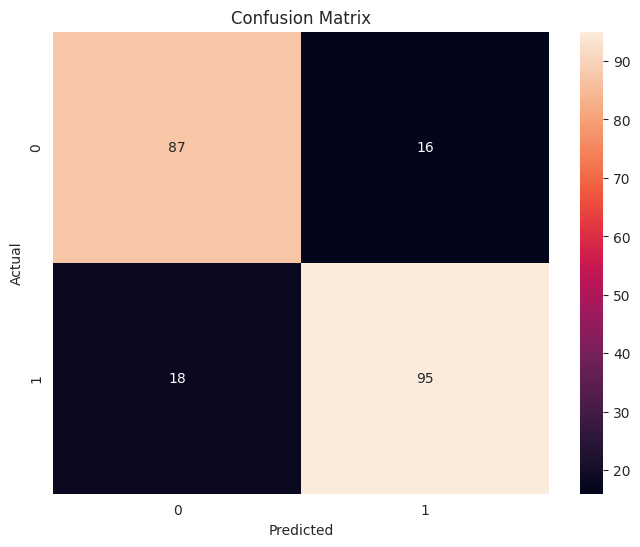

In [ ]:
from sklearn.model_selection import GridSearchCV

# 6.7 Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
best_model = grid_search.best_estimator_
print("\nBest Parameters from Grid Search:", grid_search.best_params_)

# Evaluate the tuned model
tuned_predictions = best_model.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, tuned_predictions))
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, tuned_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, tuned_predictions), annot=True, fmt='d', cmap='rocket')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">7. Feature Importance and Model Explainability</h2>
</div>

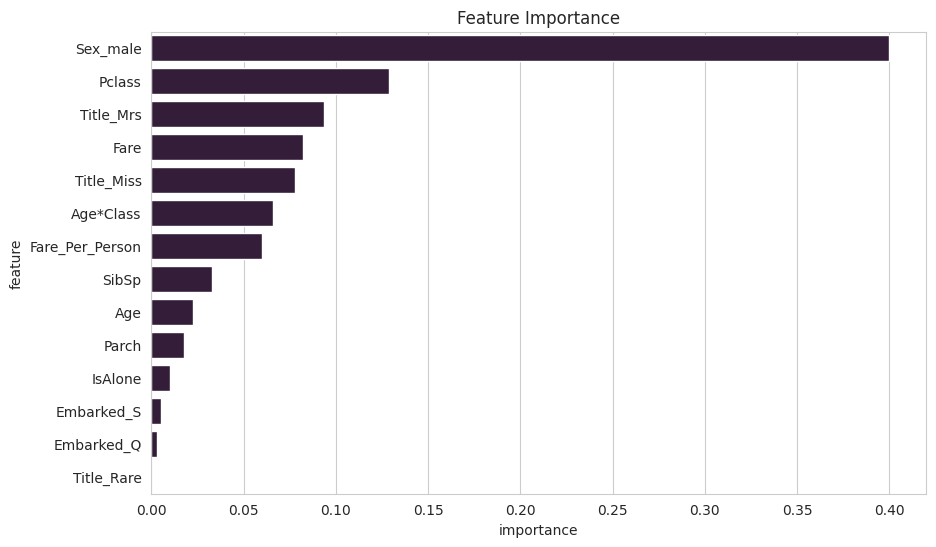

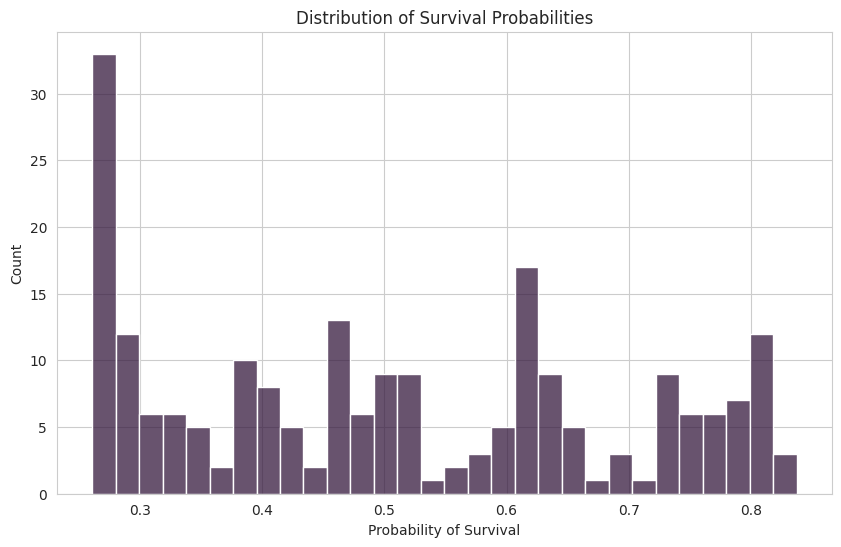

In [ ]:
features = X.columns
# 7. Feature Importance
# ------------------
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
})
plt.figure(figsize=(10, 6))
sns.barplot(data=importance.sort_values('importance', ascending=False),
            x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

# 8. Survival Probability Analysis
# ----------------------------
# Get probability predictions
prob_predictions = model.predict_proba(X_test)

# Plot probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(prob_predictions[:, 1], bins=30)
plt.title('Distribution of Survival Probabilities')
plt.xlabel('Probability of Survival')
plt.show()

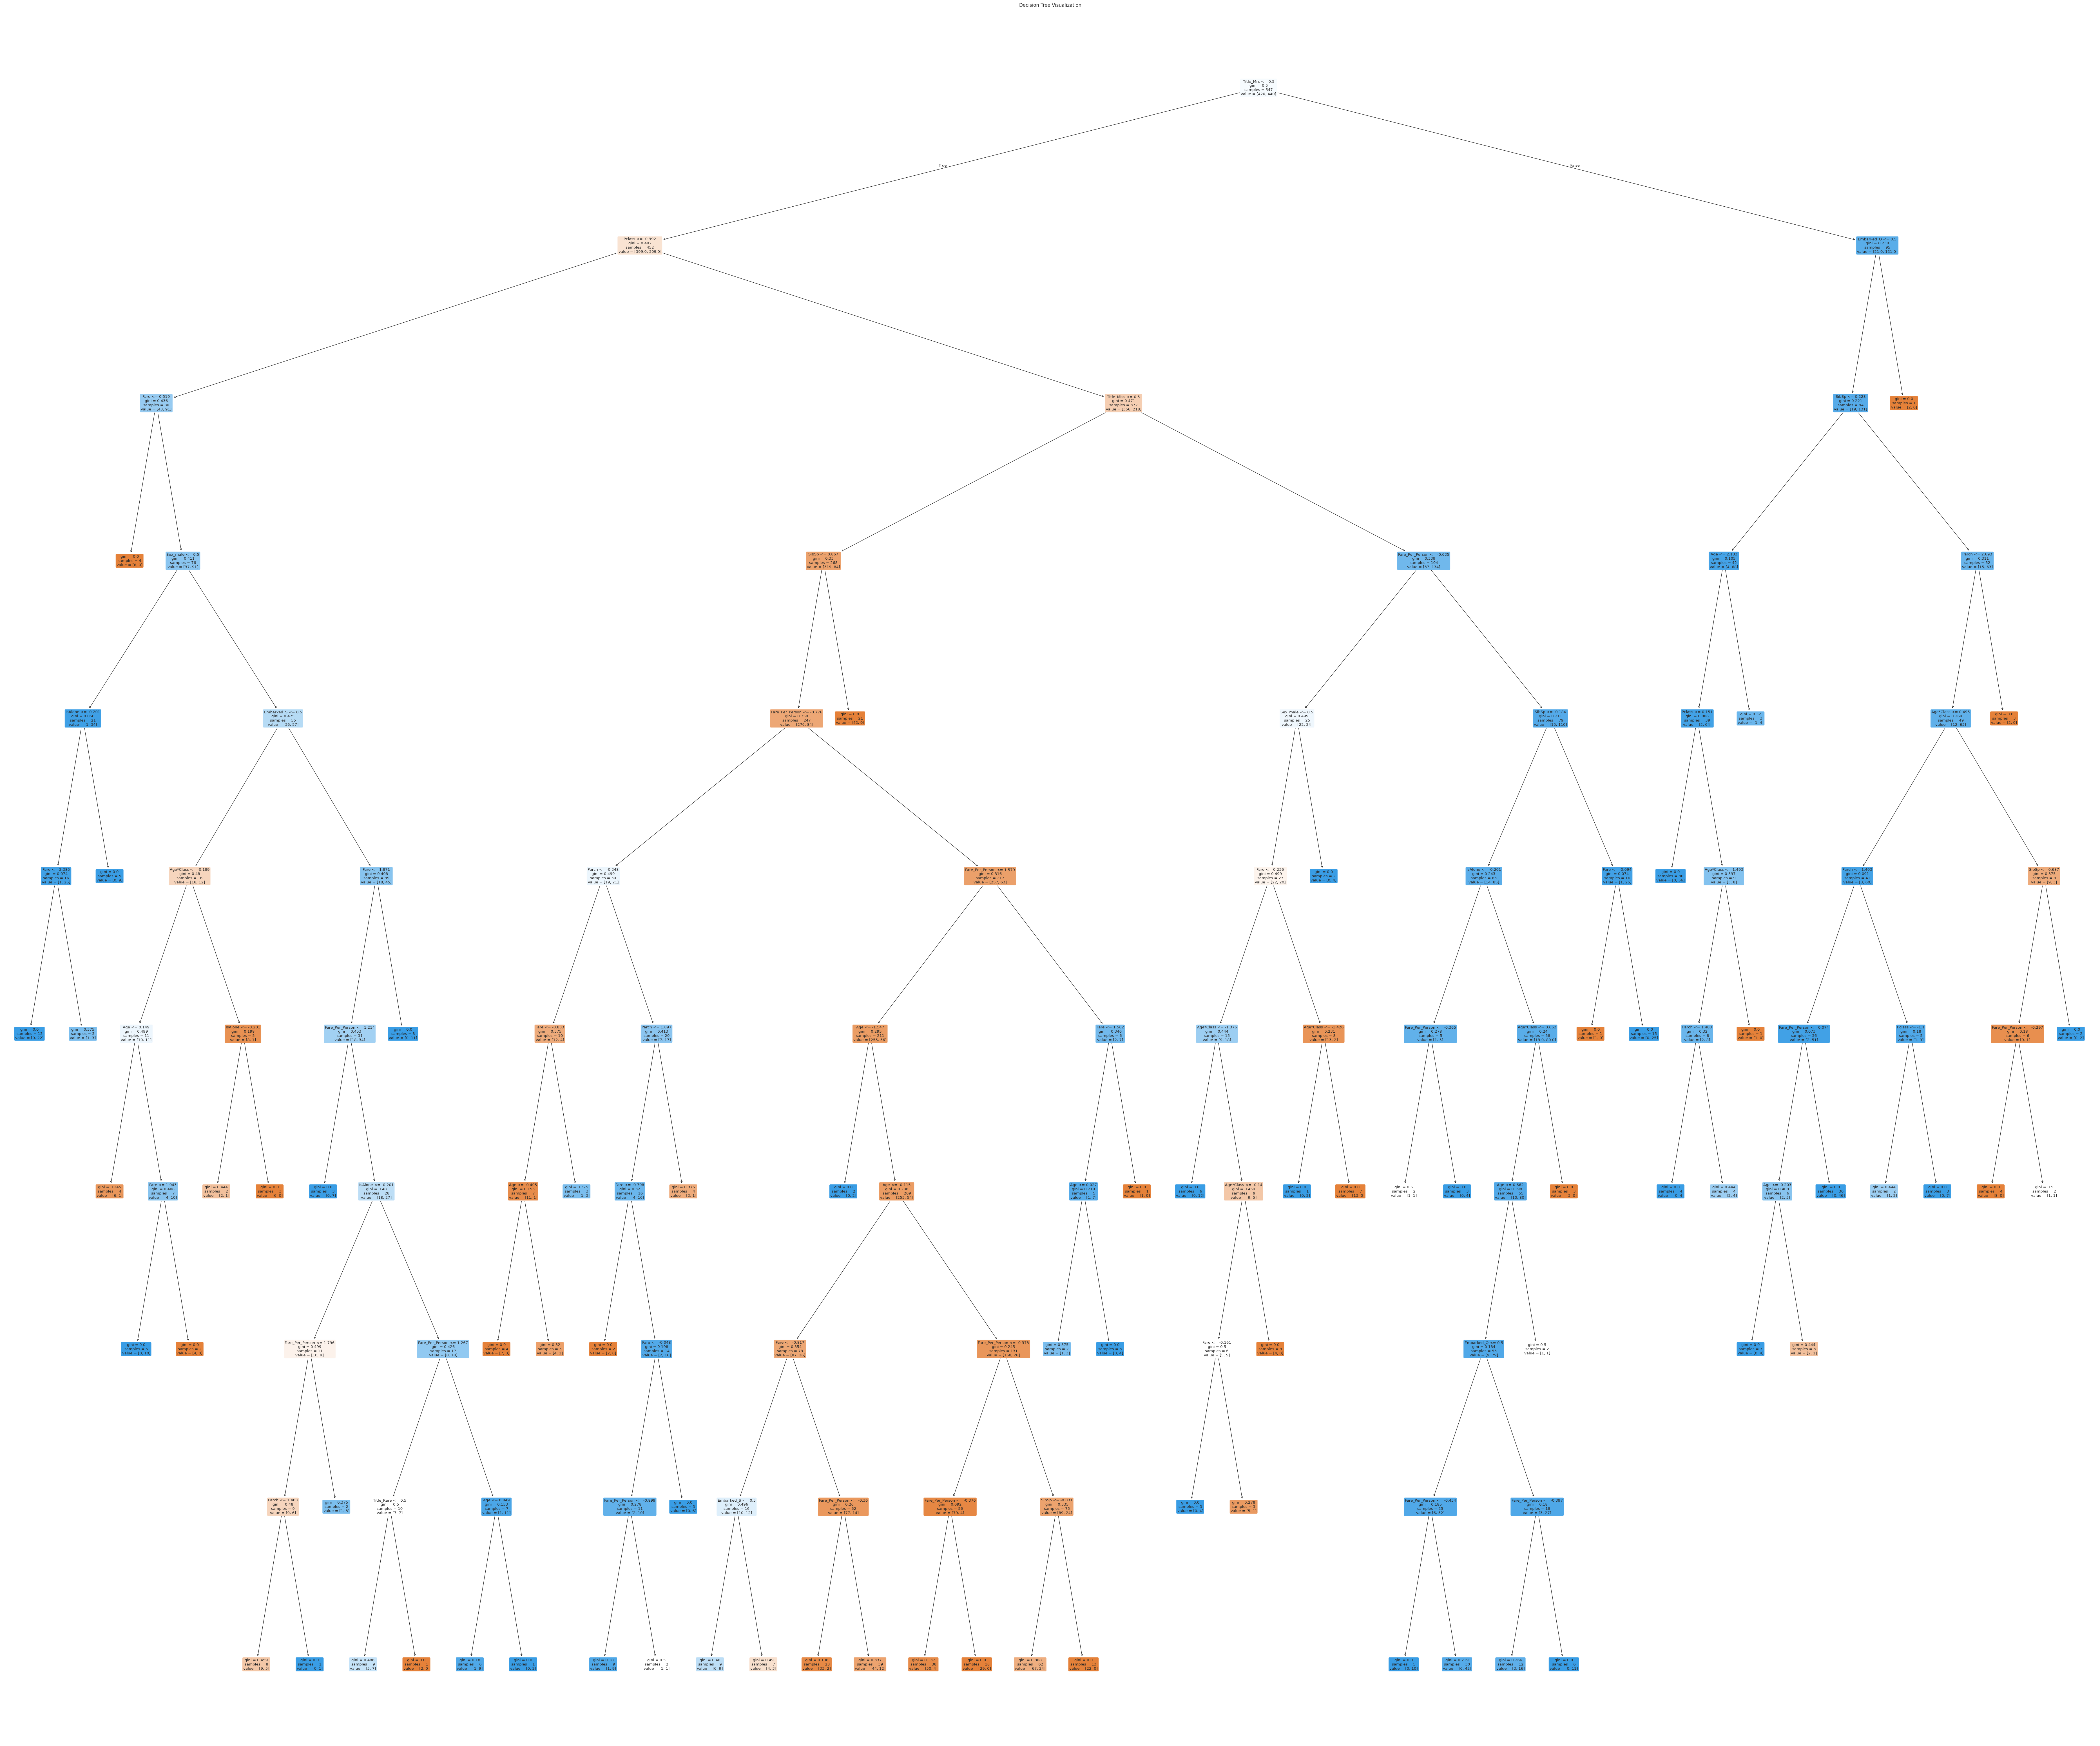

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Alternatives: Yellowbrick, Dtreeviz, Plotly

tree = best_model.estimators_[0]

plt.figure(figsize=(96, 80))
plot_tree(tree,
          feature_names=features,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


**Ensure Graphviz installation and adding to PATH**

In [ ]:
!pip install graphviz

Each node represents:

- Feature used for the first split.
- Threshold or condition for splitting.
- Distribution of target values or class probabilities.

Decision Tree's goal is to create subsets that are more "pure" (i.e., contain predominantly one class of data).

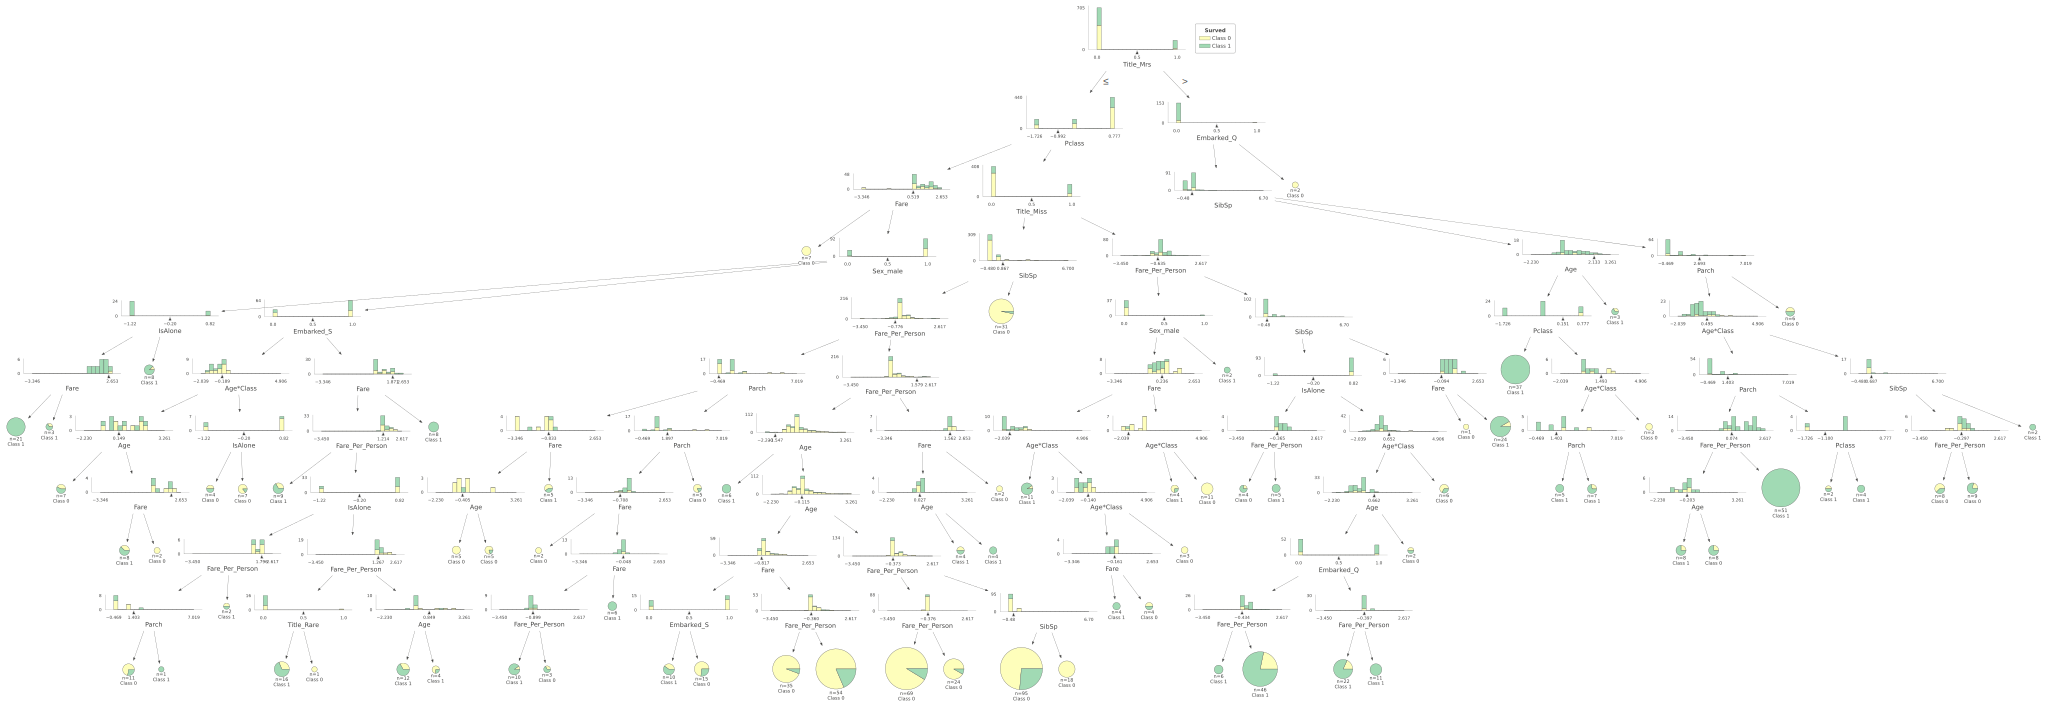

In [ ]:
import dtreeviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

viz = dtreeviz.model(
    best_model.estimators_[0],
    X_train,
    y_train,
    feature_names=features,
    target_name="Surved",
)

viz.view(fancy=True)

Alternatives to explainability: SHAP, LIME

<div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h2 style="margin: 0;">8. Conclusions</h2>
</div>

<span style="font-size:20px;">


We've covered:

**Exploratory Data Analysis and Visualisation:**
- Understanding the full story through data distributions and statistics
- Identifying appropriate data preprocessing (such as class imbalance, text extraction)
- Feature inter-correlations (heatmap correlation)
- Understanding data types and null counts to preprocess and engineer features later

**Data Preprocessing:**
- Creating/engineering more useful features after understanding their component relations
- Removing outliers and imputing null values and splitting into X (predictor) and y (target) dataframes, normalising data (standard scaler) and log transforming data to handle extreme values.
- Removing highly intercorrelated (redundant) features and dealing with class imbalance using SMOTE

**Model Building, Tuning, and Evaluation**
- Using a RandomForestClassifier model, evaluating using cross validation and train-test split
- Tuning and getting classificaiton metrics for the best model configuration
- Checking feature importances and distribution of survival probabilities
- Visualising decision tree splits to understand model</span>